**CURSO**: Análisis Geoespacial, Departamento de Geociencias y Medio Ambiente, Universidad Nacional de Colombia - sede Medellín <br/>
**Profesor**: Edier Aristizábal (evaristizabalg@unal.edu.co) <br />
**Credits**: The content of this notebook is taken from several sources, such as: [Pangeo Gallery](http://gallery.pangeo.io/index.html), [open-geo-tutorial](https://github.com/ceholden/open-geo-tutorial), [geohackweek](https://geohackweek.github.io/raster/). Every effort has been made to trace copyright holders of the materials used in this book. The author apologies for any unintentional omissions and would be pleased to add an acknowledgment in future editions. 

# Importar datos raster

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Archivos ASCII

In [2]:
import numpy as np
import matplotlib.pyplot as plt

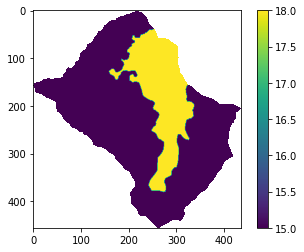

In [10]:
geologia=np.loadtxt('/content/drive/My Drive/CATEDRA/MACHINE LEARNING/datos/raster/gamma.asc', skiprows=6)
geologia=np.where(geologia==-9999.,np.nan,geologia)
plt.imshow(geologia)
plt.colorbar();

In [8]:
type(geologia)

numpy.ndarray

## Archivos TXT

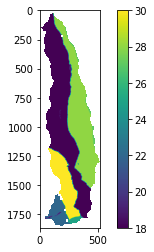

In [11]:
geologia=np.loadtxt('/content/drive/My Drive/CATEDRA/MACHINE LEARNING/datos/raster/geologia.txt', skiprows=6)
geologia=np.where(geologia==-9999.,np.nan,geologia)
plt.imshow(geologia)
plt.colorbar();

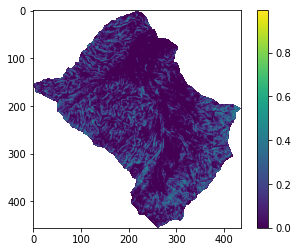

In [ ]:
FS_hazard  = np.genfromtxt('/content/drive/My Drive/INVESTIGACION/PAPERS/ELABORACION/SHIA_George/resultados/PR_AMEACA.txt')
FS_hazard = np.where(FS_hazard==-9999.,np.nan,FS_hazard)
plt.imshow(FS_hazard)
plt.colorbar();

## Geospatial Libraries

**Gdal**: [GDAL](https://gdal.org/) (Geospatial Data Abstraction Library) is a translator library for raster and vector geospatial data formats.

In [12]:
from osgeo import gdal

**Rasterio**:  [Rasterio](https://rasterio.readthedocs.io/en/latest/) is a Geographic information systems use GeoTIFF and other formats to organize and store gridded raster datasets such as satellite imagery and terrain models. Rasterio reads and writes these formats and provides a Python API based on Numpy N-dimensional arrays and GeoJSON.

In [14]:
#importar uan imagen compuesta
composite = gdal.Open('/content/drive/MyDrive/CATEDRA/SENSORES REMOTOS/QGIS/RT_LE70090532003066EDC00_B1.TIF')

#para saber el número de bandas
print(composite.RasterCount)

1


In [17]:
type(b1)

numpy.ndarray

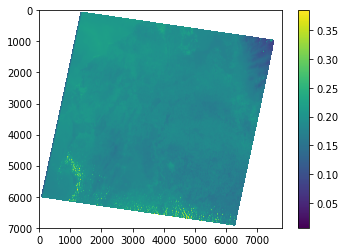

In [15]:
#para obtener el gdal.band
banda = composite.GetRasterBand(1)

#para convertirlo en array
b1 = banda.ReadAsArray()

#para graficar uan matriz se utiliza la funcion imshow
plt.imshow(b1)
plt.colorbar()

In [18]:
b1

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

## Sat_search

* bbox: bounding box of the form [minlon, minlat, maxlon, maxlat]
* intersects: A GeoJSON geometry
* time: A single date-time, a period string, or a range (seperated by /)
* sort: A dictionary of fields to sort along with ascending/descending
* query: Dictionary of properties to query on, supports eq, lt, gt, lte, gte

In [19]:
!pip install sat-search

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.7/225.7 KB 8.6 MB/s eta 0:00:00
  Created wheel for sat-search: filename=sat_search-0.3.0-py3-none-any.whl size=9256 sha256=8f308e815ba5d4eaf01b7039c852ba9e70049c0401d7d7948b8f02c9f24e60fd
  Stored in directory: /root/.cache/pip/wheels/a6/90/2b/9f732379b612b7c9a5b7b84058b3f3e1cbae17c1d89b5310e5
  Created wheel for sat-stac: filename=sat_stac-0.4.1-py3-none-any.whl size=15199 sha256=e2ed8786a198e9b11fcc9134a76f6f6c3178977b791d2453cc4344e449bcc192
  Stored in directory: /root/.cache/pip/wheels/c2/44/8c/0ade3379977ccc7a2535d4f31a663061c369efa230f8dab836
Successfully built sat-search sat-stac
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.8.2
    Uninstalling python-dateutil-2.8.2:
      Successfully uninstalled python-d

In [20]:
import satsearch
from satsearch import Search

In [23]:
coordenadas = [ 5.756057739257812,
          -75.649809962218995,
          6.10693359375,
          -74.751442372568924 ]

url = 'https://earth-search.aws.element84.com/v0'
bbox_search = Search(
    bbox=coordenadas,
    datetime="2020-10-01/2023-03-14",
    query={"eo:cloud_cover": {"lt": 40}},
    collections=["sentinel-s2-l2a-cogs"],
    url=url,)

In [24]:
items = bbox_search.items()
print(items.summary())
print('%s items' % len(items))
print('%s collections' % len(items._collections))
print(items._collections)

Items (268):
date                      id                        
2023-03-02                S2B_31CES_20230302_0_L2A  
2023-03-02                S2B_32CMB_20230302_0_L2A  
2023-03-02                S2B_31CET_20230302_0_L2A  
2023-03-02                S2B_32CMC_20230302_0_L2A  
2023-02-20                S2B_31CET_20230220_0_L2A  
2023-02-19                S2B_31CES_20230219_0_L2A  
2023-02-19                S2B_32CMB_20230219_0_L2A  
2023-02-19                S2B_31CET_20230219_0_L2A  
2023-02-19                S2B_32CMC_20230219_0_L2A  
2023-02-16                S2B_31CES_20230216_0_L2A  
2023-02-16                S2B_32CMB_20230216_0_L2A  
2023-02-16                S2B_31CET_20230216_0_L2A  
2023-02-16                S2B_32CMC_20230216_0_L2A  
2023-02-13                S2B_31CES_20230213_0_L2A  
2023-02-13                S2B_32CMB_20230213_0_L2A  
2023-02-13                S2B_31CET_20230213_0_L2A  
2023-02-13                S2B_32CMC_20230213_0_L2A  
2023-02-09                S2B_31C

In [27]:
items[0].assets

{'thumbnail': {'title': 'Thumbnail',
  'type': 'image/png',
  'roles': ['thumbnail'],
  'href': 'https://roda.sentinel-hub.com/sentinel-s2-l1c/tiles/31/C/ES/2023/3/2/0/preview.jpg'},
 'overview': {'title': 'True color image',
  'type': 'image/tiff; application=geotiff; profile=cloud-optimized',
  'roles': ['overview'],
  'gsd': 10,
  'eo:bands': [{'name': 'B04',
    'common_name': 'red',
    'center_wavelength': 0.6645,
    'full_width_half_max': 0.038},
   {'name': 'B03',
    'common_name': 'green',
    'center_wavelength': 0.56,
    'full_width_half_max': 0.045},
   {'name': 'B02',
    'common_name': 'blue',
    'center_wavelength': 0.4966,
    'full_width_half_max': 0.098}],
  'href': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/C/ES/2023/3/S2B_31CES_20230302_0_L2A/L2A_PVI.tif',
  'proj:shape': [343, 343],
  'proj:transform': [320, 0, 499980, 0, -320, 1700020, 0, 0, 1]},
 'info': {'title': 'Original JSON metadata',
  'type': 'application/json',
  'roles'

In [25]:
from IPython.display import JSON
JSON(items[6].assets)

<IPython.core.display.JSON object>

In [28]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 52.7 MB/s eta 0:00:00


In [29]:
import rasterio as rio

In [44]:
# Read and open(B4 and B8)
b4 = rio.open(items[0].asset("red")["href"])
red = b4.read(1)

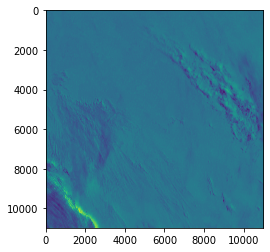

In [45]:
import matplotlib.pyplot as plt
plt.imshow(red)

<AxesSubplot:>

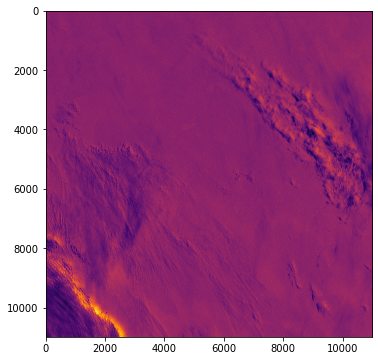

In [46]:
from rasterio.plot import show
fig, ax = plt.subplots(figsize=(8,6))
show(red,cmap="inferno", ax=ax)

In [ ]:
# NOTE this STAC API endpoint does not currently search the entire catalog

bbox = (-124.71, 45.47, -116.78, 48.93) #(west, south, east, north)

timeRange = '2019-01-01/2020-10-01'

# STAC metadata properties
properties =  ['eo:row=027',
               'eo:column=047',
               'landsat:tier=T1']

results = Search.search(collection='landsat-8-l1',
                        bbox=bbox,
                        datetime=timeRange,
                        property=properties,
                        sort=['<datetime'],
                        url=url,
                        )

print('%s items' % results.found())
items = results.items()
items.save('subset.json')

In [ ]:
import geopandas as gpd
gf = gpd.read_file("subset.json")
gf.head()

In [ ]:
from ipywidgets import interact
from IPython.display import display, Image

def browse_images(items):
    n = len(items)

    def view_image(i=0):
        item = items[i]
        print(f"id={item.id}\tdate={item.datetime}\tcloud%={item['eo:cloud_cover']}")
        display(Image(item.asset('thumbnail')['href']))

    interact(view_image, i=(0,n-1))

In [ ]:
browse_images(items)

In [ ]:
polygon = {
    "type": "Polygon",
    "coordinates": [
        [
            [11.756057739257812, 57.649809962218995],
            [12.10693359375, 57.649809962218995],
            [12.10693359375, 57.751442372568924],
            [11.756057739257812, 57.751442372568924],
            [11.756057739257812, 57.649809962218995],
        ]
    ],
}

intersect_search = Search(intersects=polygon, url=url)
print('Query returned {} items'.format(bbox_search.found()))

## Sentinel-Sat

In [47]:
import os
from shapely.geometry import MultiPolygon, Polygon

In [48]:
!pip install sentinelsat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 KB 4.6 MB/s eta 0:00:00


In [49]:
import sentinelsat
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date

In [51]:
user = 'edieraristizabal' 
file = open("/content/drive/MyDrive/CATEDRA/ANALISISGEOESPACIAL/SentinelHub/Clave Copernicus.txt", "r")
for line in file:
    password = file.readlines()

api = SentinelAPI(user, password[2][:-1], 'https://scihub.copernicus.eu/dhus')

In [ ]:
footprint = geojson_to_wkt(read_geojson('/map.geojson')) # el poligono debe ser sencillo, si tiene mucho vertice como un mapa genera error

In [53]:
aoi="POINT(6.15 -75.31)"

In [55]:
products = api.query(aoi, date=('20220101', '20230228'), platformname = 'Sentinel-2', cloudcoverpercentage = (0,20))

Querying products:  51%|#####1    | 100/195 [00:00<?, ?product/s]

In [56]:
len(products)

195

In [57]:
products_gdf = api.to_dataframe(products)
products_gdf_sorted = products_gdf.sort_values(['cloudcoverpercentage'], ascending=[True])
products_gdf_sorted.head(3)

,title,link,link_alternative,link_icon,summary,ondemand,generationdate,beginposition,endposition,ingestiondate,...,platformserialidentifier,processinglevel,datastripidentifier,granuleidentifier,identifier,uuid,datatakesensingstart,sensoroperationalmode,tileid,hv_order_tileid
5579799e-53a8-4fc5-b5ae-620956b9171a,S2B_MSIL1C_20221202T073919_N0400_R063_T32CMB_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-12-02T07:39:19.024Z, Instrument: MS...",false,2022-12-02 09:02:33,2022-12-02 07:39:19.024,2022-12-02 07:39:19.024,2022-12-02 11:51:21.292,...,Sentinel-2B,Level-1C,S2B_OPER_MSI_L1C_DS_2BPS_20221202T090233_S2022...,S2B_OPER_MSI_L1C_TL_2BPS_20221202T090233_A0299...,S2B_MSIL1C_20221202T073919_N0400_R063_T32CMB_2...,5579799e-53a8-4fc5-b5ae-620956b9171a,2022-12-02 07:39:19.024,INS-NOBS,32CMB,CB32M
262167d3-b567-4a30-b7d4-031abb42ab25,S2B_MSIL1C_20221208T075919_N0509_R006_T32CMB_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-12-08T07:59:19.024Z, Instrument: MS...",false,2022-12-08 09:19:48,2022-12-08 07:59:19.024,2022-12-08 07:59:19.024,2022-12-08 11:42:55.958,...,Sentinel-2B,Level-1C,S2B_OPER_MSI_L1C_DS_2BPS_20221208T091948_S2022...,S2B_OPER_MSI_L1C_TL_2BPS_20221208T091948_A0300...,S2B_MSIL1C_20221208T075919_N0509_R006_T32CMB_2...,262167d3-b567-4a30-b7d4-031abb42ab25,2022-12-08 07:59:19.024,INS-NOBS,32CMB,CB32M
b97712d5-0134-441d-b287-51f4f880249b,S2B_MSIL1C_20221208T075919_N0509_R006_T31CES_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-12-08T07:59:19.024Z, Instrument: MS...",false,2022-12-08 09:19:48,2022-12-08 07:59:19.024,2022-12-08 07:59:19.024,2022-12-08 11:55:25.224,...,Sentinel-2B,Level-1C,S2B_OPER_MSI_L1C_DS_2BPS_20221208T091948_S2022...,S2B_OPER_MSI_L1C_TL_2BPS_20221208T091948_A0300...,S2B_MSIL1C_20221208T075919_N0509_R006_T31CES_2...,b97712d5-0134-441d-b287-51f4f880249b,2022-12-08 07:59:19.024,INS-NOBS,31CES,CS31E


In [59]:
api.download("5579799e-53a8-4fc5-b5ae-620956b9171a")

MD5 checksumming:   0%|          | 0.00/607M [00:00<?, ?B/s]

{'id': '5579799e-53a8-4fc5-b5ae-620956b9171a',
 'title': 'S2B_MSIL1C_20221202T073919_N0400_R063_T32CMB_20221202T090233',
 'size': 607347822,
 'md5': '10378935151f3580ded29634a9f8a9fd',
 'date': datetime.datetime(2022, 12, 2, 7, 39, 19, 24000),
 'footprint': 'POLYGON((5.588231062679681 -74.76247216773208,9.333232266590475 -74.78799292154739,9.355744128770178 -75.77205383327383,5.358340329602027 -75.74469149190637,5.588231062679681 -74.76247216773208))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('5579799e-53a8-4fc5-b5ae-620956b9171a')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2022, 12, 2, 11, 52, 4, 451000),
 'Ingestion Date': datetime.datetime(2022, 12, 2, 11, 51, 21, 292000),
 'manifest_name': 'manifest.safe',
 'product_root_dir': 'S2B_MSIL1C_20221202T073919_N0400_R063_T32CMB_20221202T090233.SAFE',
 'quicklook_url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('5579799e-53a8-4fc5-b5ae-620956b9171a')/Products('Quicklook')/$value",
 'path': 

In [63]:
!unzip 'S2B_MSIL1C_20221202T073919_N0400_R063_T32CMB_20221202T090233.zip' --quite

Archive:  S2B_MSIL1C_20221202T073919_N0400_R063_T32CMB_20221202T090233.zip
caution: filename not matched:  --quite


In [64]:
from zipfile import ZipFile
ZipFile("/content/S2B_MSIL1C_20221202T073919_N0400_R063_T32CMB_20221202T090233.zip").extractall()

In [ ]:
!gdalinfo S2B_MSIL2A_20191009T073939_N0213_R063_T32CMB_20191009T130037.zip

In [67]:
!gdalinfo S2B_MSIL1C_20221202T073919_N0400_R063_T32CMB_20221202T090233.SAFE\MTD_MSIL2A.xml

/bin/bash: gdalinfo: command not found


Tener en cuenta la primera parte del archivo SENTINEL2_L2A, la ultima parte puede cambiar de acuerdo con el nivel de procesamiento de la imagen 'L1C', etc. Al igual que el CRS en términos de EPSG, el cual puede ser obtenido de la función anterior.

In [66]:
!gdalinfo S2B_MSIL2A_20191009T073939_N0213_R063_T32CMB_20191009T130037.SAFE\MTD_MSIL2A.xml:10m:EPSG_32732

/bin/bash: gdalinfo: command not found


In [ ]:
!gdal_translate SENTINEL2_L2A:S2B_MSIL2A_20191009T073939_N0213_R063_T32CMB_20191009T130037.SAFE\MTD_MSIL2A.xml:10m:EPSG_32732 \
                 10m.tif \
                 -co TILED=YES --config GDAL_CACHEMAX 1000 --config GDAL_NUM_THREADS 2

In [68]:
dataset = gdal.Open('/content/S2B_MSIL1C_20221202T073919_N0400_R063_T32CMB_20221202T090233.SAFE/GRANULE/L1C_T32CMB_A029976_20221202T073916/IMG_DATA/T32CMB_20221202T073919_B04.jp2')
print(dataset)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f57581c3f00> >


In [69]:
num_bands = dataset.RasterCount
print('Number of bands in image: {n}\n'.format(n=num_bands))

Number of bands in image: 1



In [70]:
b4 = dataset.GetRasterBand(1)
b4 = b4.ReadAsArray()
print(b4)

[[10294 10270 10209 ... 10818 10851 10879]
 [10289 10246 10251 ... 10831 10897 10829]
 [10302 10244 10301 ... 10788 10797 10807]
 ...
 [ 9641  9642  9648 ...  9893  9932  9899]
 [ 9687  9630  9600 ...  9912  9918  9894]
 [ 9637  9607  9587 ...  9885  9915  9881]]


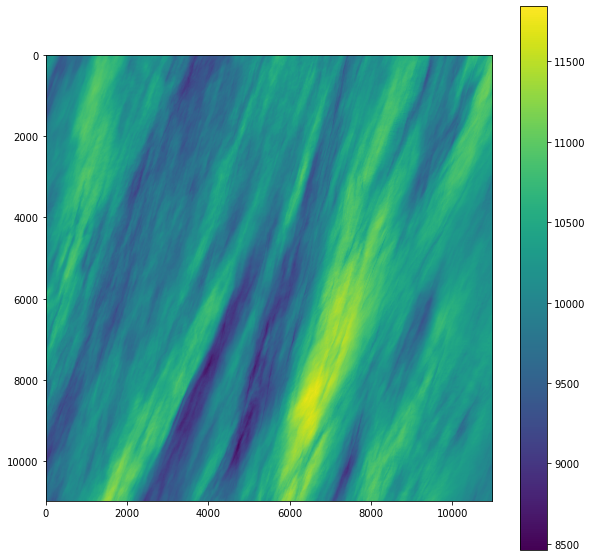

In [71]:
#b4=np.where(b4==0,np.nan,b4)
fig, ax = plt.subplots(1, figsize=(10, 10))
plt.imshow(b4)
plt.colorbar();


## Google Cloud

[Cloud Storage](https://cloud.google.com/storage/docs) allows world-wide storage and retrieval of any amount of data at any time. You can use Cloud Storage for a range of scenarios including serving website content, storing data for archival and disaster recovery, or distributing large data objects to users via direct download.

Cloud Storage provides a variety of public datasets that can be accessed by the community and integrated into their applications. Google pays for the hosting of these datasets, providing public access to the data via the Google Cloud Console, gsutil, or with the Cloud Storage API.

### Available public datasets on Cloud Storage
- [Landsat](https://console.cloud.google.com/storage/browser/gcp-public-data-landsat?pageState=(%22StorageObjectListTable%22:(%22f%22:%22%255B%255D%22))&prefix=&forceOnObjectsSortingFiltering=false): A satellite image dataset from the United States Geological Survey (USGS) and NASA that includes millions of multispectral images of the Earth's land surface, at resolutions of between 15 and 60 meters per pixel, from 1982 through the present.

- [Sentinel-2](https://console.cloud.google.com/storage/browser/gcp-public-data-sentinel-2;tab=objects?_ga=2.243846213.1981017282.1614808297-1548957655.1604964455&prefix=&forceOnObjectsSortingFiltering=false): A satellite image dataset from the European Space Agency (ESA) that includes multispectral images of the Earth's land surface, with a resolution of 10–60 meters per pixel, from 2015 through the present.

- [NEXRAD](https://console.cloud.google.com/storage/browser/gcp-public-data-nexrad-l2;tab=objects?_ga=2.244393029.1981017282.1614808297-1548957655.1604964455&prefix=&forceOnObjectsSortingFiltering=false): A weather radar dataset collected from a network of 160 high-resolution Doppler weather radars operated by the NOAA National Weather Service (NWS), the Federal Aviation Administration (FAA), and the U.S. Air Force (USAF).

### Additional sources

- [EarthAI](https://astraea.earth/platform/)